In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Carregue a primeira tabela de dados
tabela1 = pd.read_csv('/content/Cópia de Avaliacoes  - avaliacoes.csv')

# Carregue a segunda tabela de dados
tabela2 = pd.read_csv('/content/Cópia de Dados_Imersão - dados.csv')


In [3]:
# Mesclar as tabelas com base na coluna "chave"
tabelas_mescladas = pd.merge(tabela1, tabela2, on='product_id', how='inner')


In [4]:
tabelas_mescladas.head(1)

,product_id,user_id,user_name,review_id,review_title,review_content,img_link,product_name,category,actual_price,product_price,rating,rating_count,about_product,product_link
0,B07JW9H4J1,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,"₹399,00","₹1.099,00","4,5",24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...


In [5]:
tabelas_mescladas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1737 entries, 0 to 1736
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      1737 non-null   object
 1   user_id         1737 non-null   object
 2   user_name       1737 non-null   object
 3   review_id       1737 non-null   object
 4   review_title    1737 non-null   object
 5   review_content  1737 non-null   object
 6   img_link        1737 non-null   object
 7   product_name    1737 non-null   object
 8   category        1737 non-null   object
 9   actual_price    1737 non-null   object
 10  product_price   1737 non-null   object
 11  rating          1737 non-null   object
 12  rating_count    1737 non-null   int64 
 13  about_product   1737 non-null   object
 14  product_link    1737 non-null   object
dtypes: int64(1), object(14)
memory usage: 217.1+ KB


In [6]:
# Use str.replace para remover o símbolo da rupia
tabelas_mescladas['actual_price'] = tabelas_mescladas['actual_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '.')
tabelas_mescladas['product_price'] = tabelas_mescladas['product_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '.')

# Em seguida, use a função pd.to_numeric para converter a coluna para números
tabelas_mescladas['product_price'] = pd.to_numeric(tabelas_mescladas['product_price'], errors='coerce')
tabelas_mescladas['actual_price'] = pd.to_numeric(tabelas_mescladas['actual_price'], errors='coerce')

# rating
tabelas_mescladas['rating'] = tabelas_mescladas['rating'].str.replace(',', '.')
tabelas_mescladas['rating'] = pd.to_numeric(tabelas_mescladas['rating'], errors='coerce')


<ipython-input-6-8b23f028196b>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tabelas_mescladas['actual_price'] = tabelas_mescladas['actual_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '.')
<ipython-input-6-8b23f028196b>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tabelas_mescladas['product_price'] = tabelas_mescladas['product_price'].str.replace('₹', '').str.replace('.', '').str.replace(',', '.')


In [8]:
# Defina a taxa de câmbio
taxa_de_cambio = 0.057

# Crie uma nova coluna com os valores convertidos para BRL
tabelas_mescladas['actual_price_brl'] = tabelas_mescladas['actual_price'] * taxa_de_cambio
tabelas_mescladas['product_price_brl'] = tabelas_mescladas['product_price'] * taxa_de_cambio

# Reorganize as colunas para colocar a nova coluna em uma posição específica
colunas = list(tabelas_mescladas.columns)
colunas.insert(colunas.index('actual_price') + 1, 'actual_price_brl')
colunas.insert(colunas.index('product_price') + 1, 'product_price_brl')
tabelas_mescladas = tabelas_mescladas[colunas]


In [9]:
tabelas_mescladas.head(1)

,product_id,user_id,user_name,review_id,review_title,review_content,img_link,product_name,category,actual_price,actual_price_brl,product_price,product_price_brl,rating,rating_count,about_product,product_link,actual_price_brl,product_price_brl
0,B07JW9H4J1,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,22.743,1099.0,62.643,4.5,24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,22.743,62.643


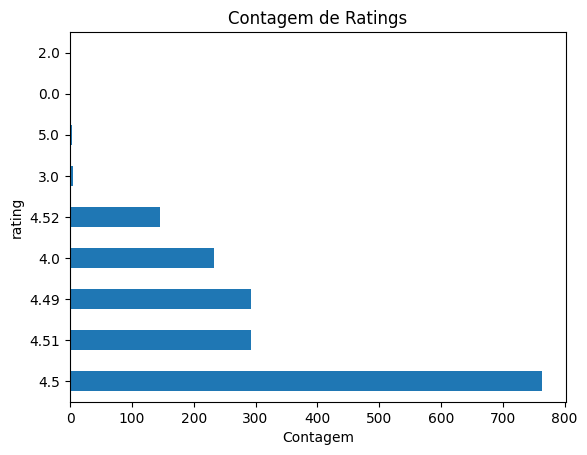

In [10]:
# Use o método .plot() para criar o gráfico de barras
tabelas_mescladas['rating'].value_counts().plot(kind='barh')

# Defina rótulos dos eixos e o título
plt.xlabel('Contagem')
plt.ylabel('rating')
plt.title('Contagem de Ratings')

plt.show()